# Discovering Dynamic Patterns from Coronavirus Data using Dynamic Mode Decomposition with Control: World Data

## Import Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from pydmd import DMD,DMDc,DMDBase
from datetime import timedelta, date, datetime
import re 
from urllib.request import urlopen
import json
import plotly.express as px
from control.matlab import *
# Note: Python control toolbox can be found at at https://python-control.readthedocs.io/
import slycot
import scipy 

# for dark theme
plt.rcParams['text.color'] = 'white'
plt.rcParams.update({'text.color' : "white",
                     'axes.labelcolor' : "white",
                    'xtick.color' : "white",
                    'ytick.color' : "white"})

In [2]:
# for light theme
plt.rcParams['text.color'] = 'black'
plt.rcParams.update({'text.color' : "black",
                     'axes.labelcolor' : "black",
                    'xtick.color' : "black",
                    'ytick.color' : "black"})

In [3]:
# import time_series_covid19_confirmed_global.csv
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url, error_bad_lines=False)

In [4]:
# import time_series_covid19_deaths_global.csv
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
deaths = pd.read_csv(url, error_bad_lines=False)

In [5]:
confirmed

Province/State         Country/Region        Lat       Long  \
0                          NaN            Afghanistan  33.000000  65.000000   
1                          NaN                Albania  41.153300  20.168300   
2                          NaN                Algeria  28.033900   1.659600   
3                          NaN                Andorra  42.506300   1.521800   
4                          NaN                 Angola -11.202700  17.873900   
..                         ...                    ...        ...        ...   
259  Saint Pierre and Miquelon                 France  46.885200 -56.315900   
260                        NaN            South Sudan   6.877000  31.307000   
261                        NaN         Western Sahara  24.215500 -12.885800   
262                        NaN  Sao Tome and Principe   0.186360   6.613081   
263                        NaN                  Yemen  15.552727  48.516388   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/19/20  \
0          0        0        0        0        0        0  ...      996   
1          0        0        0        0        0        0  ...      562   
2          0        0        0        0        0        0  ...     2629   
3          0        0        0        0        0        0  ...      713   
4          0        0        0        0        0        0  ...       24   
..       ...      ...      ...      ...      ...      ...  ...      ...   
259        0        0        0        0        0        0  ...        1   
260        0        0        0        0        0        0  ...        4   
261        0        0        0        0        0        0  ...        6   
262        0        0        0        0        0        0  ...        4   
263        0        0        0        0        0        0  ...        1   

     4/20/20  4/21/20  4/22/20  4/23/20  4/24/20  4/25/20  4/26/20  4/27/20  \
0       1026     1092     1176     1279     1351     1463     1531     1703   
1        584      609      634      663      678      712      726      736   
2       2718     2811     2910     3007     3127     3256     3382     3517   
3        717      717      723      723      731      738      738      743   
4         24       24       25       25       25       25       26       27   
..       ...      ...      ...      ...      ...      ...      ...      ...   
259        1        1        1        1        1        1        1        1   
260        4        4        4        5        5        5        6        6   
261        6        6        6        6        6        6        6        6   
262        4        4        4        4        4        4        4        4   
263        1        1        1        1        1        1        1        1   

     4/28/20  
0       1828  
1        750  
2       3649  
3        743  
4         27  
..       ...  
259        1  
260       34  
261        6  
262        8  
263        1  

[264 rows x 102 columns]

In [6]:
deaths

Province/State         Country/Region        Lat       Long  \
0                          NaN            Afghanistan  33.000000  65.000000   
1                          NaN                Albania  41.153300  20.168300   
2                          NaN                Algeria  28.033900   1.659600   
3                          NaN                Andorra  42.506300   1.521800   
4                          NaN                 Angola -11.202700  17.873900   
..                         ...                    ...        ...        ...   
259  Saint Pierre and Miquelon                 France  46.885200 -56.315900   
260                        NaN            South Sudan   6.877000  31.307000   
261                        NaN         Western Sahara  24.215500 -12.885800   
262                        NaN  Sao Tome and Principe   0.186360   6.613081   
263                        NaN                  Yemen  15.552727  48.516388   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/19/20  \
0          0        0        0        0        0        0  ...       33   
1          0        0        0        0        0        0  ...       26   
2          0        0        0        0        0        0  ...      375   
3          0        0        0        0        0        0  ...       36   
4          0        0        0        0        0        0  ...        2   
..       ...      ...      ...      ...      ...      ...  ...      ...   
259        0        0        0        0        0        0  ...        0   
260        0        0        0        0        0        0  ...        0   
261        0        0        0        0        0        0  ...        0   
262        0        0        0        0        0        0  ...        0   
263        0        0        0        0        0        0  ...        0   

     4/20/20  4/21/20  4/22/20  4/23/20  4/24/20  4/25/20  4/26/20  4/27/20  \
0         36       36       40       42       43       47       50       57   
1         26       26       27       27       27       27       28       28   
2        384      392      402      407      415      419      425      432   
3         37       37       37       37       40       40       40       40   
4          2        2        2        2        2        2        2        2   
..       ...      ...      ...      ...      ...      ...      ...      ...   
259        0        0        0        0        0        0        0        0   
260        0        0        0        0        0        0        0        0   
261        0        0        0        0        0        0        0        0   
262        0        0        0        0        0        0        0        0   
263        0        0        0        0        0        0        0        0   

     4/28/20  
0         58  
1         30  
2        437  
3         41  
4          2  
..       ...  
259        0  
260        0  
261        0  
262        0  
263        0  

[264 rows x 102 columns]

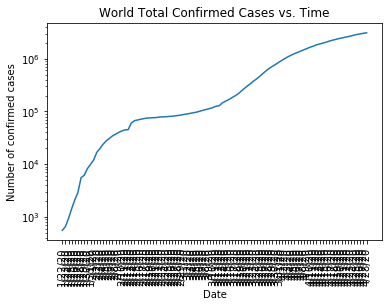

In [7]:
# plot confirmed cases vs. time
plt.title('World Total Confirmed Cases vs. Time')

plt.plot(confirmed.loc[:,'1/22/20':].sum())

plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
plt.yscale('log')
plt.xticks(rotation='vertical')

plt.show()

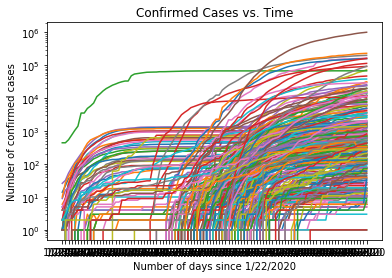

In [8]:
# plot confirmed cases vs. time
plt.title('Confirmed Cases vs. Time')

plt.plot(confirmed.loc[:,'1/22/20':].T)

plt.xlabel('Number of days since 1/22/2020')
plt.ylabel('Number of confirmed cases')
plt.yscale('log')

plt.show()

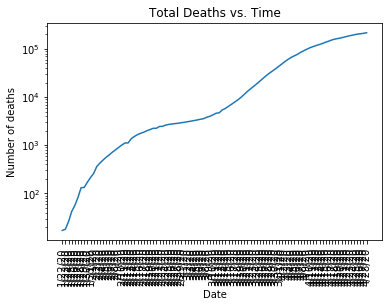

In [9]:
# plot confirmed cases vs. time
plt.title('Total Deaths vs. Time')

plt.plot(deaths.loc[:,'1/22/20':].sum())

plt.xlabel('Date')
plt.ylabel('Number of deaths')
plt.yscale('log')
plt.xticks(rotation='vertical')

plt.show()

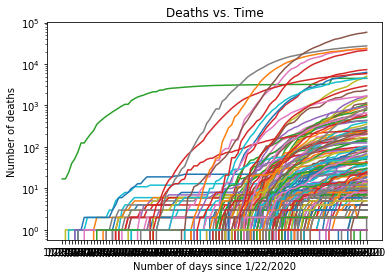

In [10]:
# plot confirmed cases vs. time
plt.title('Deaths vs. Time')

plt.plot(deaths.loc[ :,'1/22/20':].T)

plt.xlabel('Number of days since 1/22/2020')
plt.ylabel('Number of deaths')
plt.yscale('log')

plt.show()

## Convert Data into an Array

subtract mean from time series and set variance to one

In [11]:
# Select data with few initial conditions of 0
scaledData = confirmed.loc[:,'3/10/20':] # starting March 10th

In [12]:
# Convert data to array
scaledData = scaledData.to_numpy()
scaledData

array([[   5,    7,    7, ..., 1531, 1703, 1828],
       [  10,   12,   23, ...,  726,  736,  750],
       [  20,   20,   24, ..., 3382, 3517, 3649],
       ...,
       [   0,    0,    0, ...,    6,    6,    6],
       [   0,    0,    0, ...,    4,    4,    8],
       [   0,    0,    0, ...,    1,    1,    1]], dtype=int64)

## Take DMD

In [13]:
dmd = DMD(svd_rank=3)
dmd.fit(scaledData)


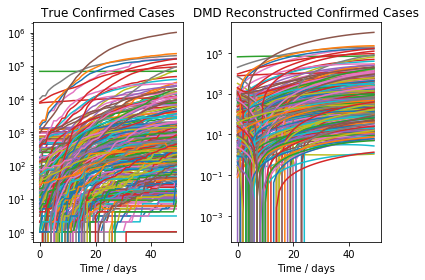

In [14]:
# plot true data
plt.subplot(1, 2, 1)
plt.title('True Confirmed Cases')
plt.plot(scaledData.T)
plt.xlabel('Time / days')
plt.yscale('log')

# plot dmd reconstructed data
plt.subplot(1, 2, 2)
plt.title('DMD Reconstructed Confirmed Cases')
plt.plot(dmd.reconstructed_data.real.T)
plt.xlabel('Time / days')
plt.yscale('log')
plt.tight_layout()
plt.show()

Eigenvalue (1.0142918008263448+0j): distance from unit circle 0.028787857223549596
Eigenvalue (1.0098855231345412+0.05994049415077992j): distance from unit circle 0.02346163267576551
Eigenvalue (1.0098855231345412-0.05994049415077992j): distance from unit circle 0.02346163267576551


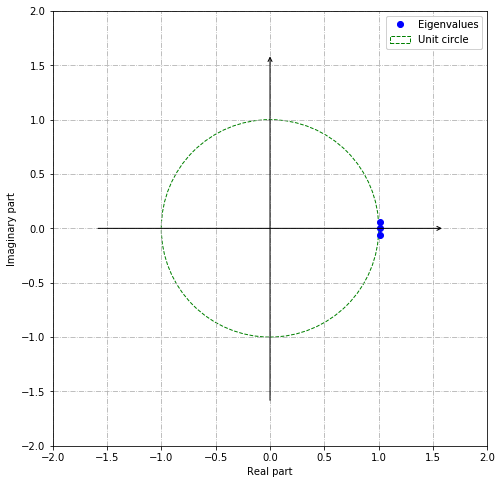

In [15]:
for eig in dmd.eigs:
    print('Eigenvalue {}: distance from unit circle {}'.format(eig, np.abs(eig.imag**2+eig.real**2 - 1)))

dmd.plot_eigs(show_axes=True, show_unit_circle=True)

Eigenvalue 0.014190635788657804, 0.0
Eigenvalue 0.011595319511299369, 0.059284199750035765
Eigenvalue 0.011595319511299369, -0.059284199750035765


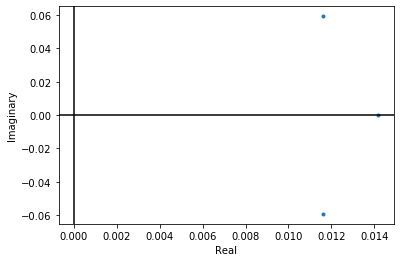

In [16]:
# Continuous Eigenvalues

plt.plot(np.log(dmd.eigs).real,np.log(dmd.eigs).imag,'.')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('Real')
plt.ylabel('Imaginary')

for eig in dmd.eigs:
    print('Eigenvalue {}, {}'.format(np.log(eig).real, np.log(eig).imag))

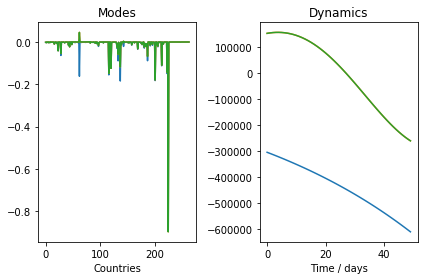

In [17]:
# modes
plt.subplot(1, 2, 1)
for mode in dmd.modes.T:
    plt.plot(mode.real)
    plt.title('Modes')
    plt.xlabel('Countries')


# dynamics
plt.subplot(1, 2, 2)
for dynamic in dmd.dynamics:
    plt.plot(dynamic.real)
    plt.title('Dynamics')
    plt.xlabel('Time / days')
plt.tight_layout()

plt.show()


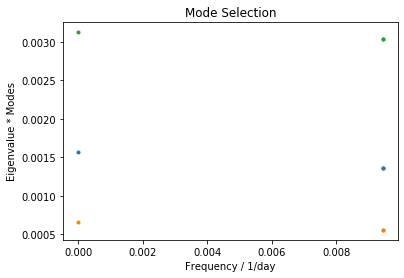

In [18]:
# Mode Selection

# Continuous Time Oscillatory Frequency for 24 hour period (units 1/h)
freq = (np.log(dmd.eigs)).imag/(2*np.pi)

i = 0
for eig in dmd.eigs:
    plt.plot(abs(freq),(abs(dmd.modes.real*eig))[i,:],'.')
    i+=1
plt.title('Mode Selection')
plt.xlabel('Frequency / 1/day')
plt.ylabel('Eigenvalue * Modes')
plt.show()


In [19]:
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
df = confirmed
fig = px.choropleth(df,    locations='Country/Region',  
                           color=abs(mode.real),
                           range_color=(0, 1),
                           scope="world",
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Predict
1. Reduce data from last time step using dynamic modes:
$$
\mathbf{x}_k^{\sim} = U^{+}\mathbf{x}_k
$$

2. Use previous reduced data time step to get the next reduced data array:
$$
\mathbf{x}_{k+1}^{\sim} = \mathbf{A}\mathbf{x}_k^{\sim} 
$$

3. Multiply the reduced data by the modes to obtain the predicted data array:
$$
\mathbf{x}_{k} = \mathbf{U}\mathbf{x}_k^{\sim} 
$$

In [20]:
# Take DMD of data
dmd = DMD(svd_rank=3) # truncated SVD
dmd.fit(scaledData)

At = dmd.atilde #Koopman operator

In [21]:
# compute reduced data prediction and actual data prediction

# Intialize
days = 100 # number of days in the future to predict
x = np.zeros((len(scaledData[:,-1]),days)) # actual prediction
xt = np.zeros((len(At),days)) # reduced prediction
x[:,0] = scaledData[:,-1]
xt[:,0] = np.matmul(np.linalg.pinv(dmd.modes),scaledData[:,-1])

# Iterate to produce actual and reduced predictions
for i in range(1,days):
    xt[:,i] = np.matmul(At,xt[:,i-1])
    x[:,i] = np.matmul(dmd.modes,xt[:,i])

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: ComplexWarning:

Casting complex values to real discards the imaginary part



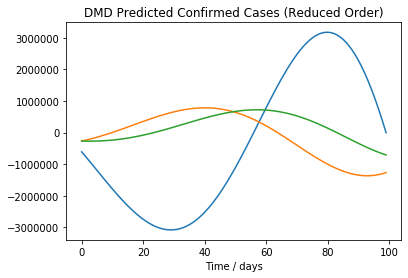

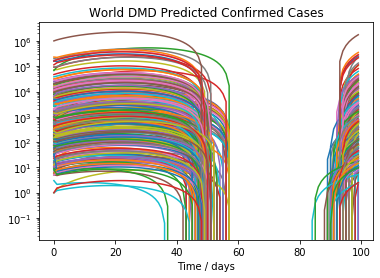

In [22]:
# Plot predicted cases
plt.plot(xt.T)
plt.title('DMD Predicted Confirmed Cases (Reduced Order)')
plt.xlabel('Time / days')
plt.show()

plt.plot(x.T)
plt.title('World DMD Predicted Confirmed Cases')
plt.xlabel('Time / days')
plt.yscale('log')
plt.show()

#### Testing prediction accuracy:

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: ComplexWarning:

Casting complex values to real discards the imaginary part



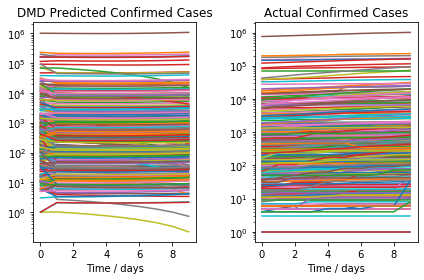

In [23]:
# Take DMD of data
days = 10 # number of days in the future to predict
testDays = np.size(scaledData,1)-days

dmd = DMD(svd_rank=3) # truncated SVD
dmd.fit(scaledData[:,:testDays]) # fit for selected days

At = dmd.atilde #Koopman operator

# compute reduced data prediction and actual data prediction

# Intialize
x = np.zeros((len(scaledData[:,testDays*-1]),days)) # actual prediction
xt = np.zeros((len(At),days)) # reduced prediction
x[:,0] = scaledData[:,-1]
xt[:,0] = np.matmul(np.linalg.pinv(dmd.modes),scaledData[:,-1])

# Iterate to produce actual and reduced predictions
for i in range(1,days):
    xt[:,i] = np.matmul(At,xt[:,i-1])
    x[:,i] = np.matmul(dmd.modes,xt[:,i])
    
plt.subplot(1, 2, 1)
plt.plot(x.T)
plt.title('DMD Predicted Confirmed Cases')
plt.xlabel('Time / days')
plt.yscale('log')

plt.subplot(1, 2, 2)
plt.plot(scaledData[:,testDays:].T)
plt.title('Actual Confirmed Cases')
plt.xlabel('Time / days')
plt.yscale('log')
plt.tight_layout()

plt.show()


In [24]:
['Predicted Day {}: Mean Error {} %, Standard Deviation of Error +/-{} %'.format(i+1,np.mean(np.abs(x[:,i]-scaledData[:,i+testDays]))/np.mean(scaledData[:,i+testDays])*100,np.std(np.abs(x[:,i]-scaledData[:,i+testDays]))/np.std(scaledData[:,i+testDays])*100) for i in range(days)]

['Predicted Day 1: Mean Error 29.81215348108977 %, Standard Deviation of Error +/-31.85593536517313 %',
 'Predicted Day 2: Mean Error 19.348335276630266 %, Standard Deviation of Error +/-26.29728408529497 %',
 'Predicted Day 3: Mean Error 15.96028213424296 %, Standard Deviation of Error +/-21.06412269060692 %',
 'Predicted Day 4: Mean Error 13.643390010444378 %, Standard Deviation of Error +/-16.870620651505895 %',
 'Predicted Day 5: Mean Error 12.140184320675163 %, Standard Deviation of Error +/-13.550563202210759 %',
 'Predicted Day 6: Mean Error 11.80238987600281 %, Standard Deviation of Error +/-10.62787213762847 %',
 'Predicted Day 7: Mean Error 11.80211760062382 %, Standard Deviation of Error +/-9.131844975861501 %',
 'Predicted Day 8: Mean Error 12.260781764613593 %, Standard Deviation of Error +/-8.917679403761637 %',
 'Predicted Day 9: Mean Error 13.078282528960322 %, Standard Deviation of Error +/-9.474368091000525 %',
 'Predicted Day 10: Mean Error 14.405824011908477 %, Stan

Predictions are only valid for about 15 days.  The highest accuracy predictions occur at an svd rank of 3.

### DMDc: DMD with Control

Since we want to add the control, the evolution of the complex system can be formally summarized as:$$
\mathbf{x}_{k+1} = \mathbf{A}\mathbf{x}_k + \mathbf{B}\mathbf{u}_k,
$$where the operators $\mathbf{A}$ and $\mathbf{B}$ are the ones we will approximate using DMD.

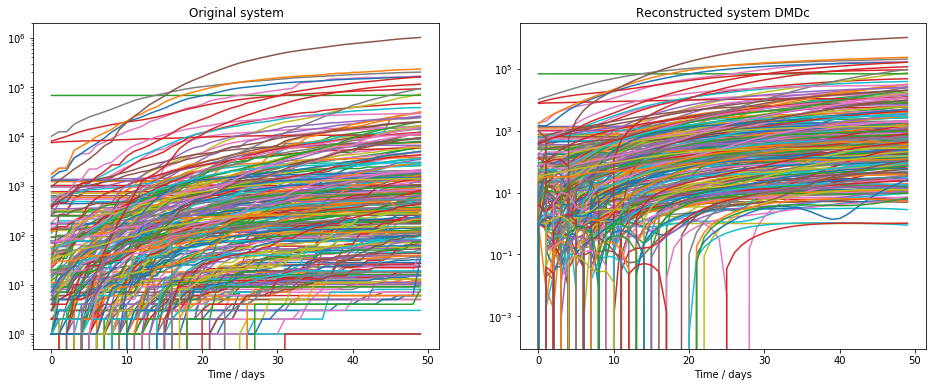

In [25]:
dmdc = DMDc()
dmdc.fit(scaledData, np.zeros(np.size(scaledData,1)-1)) # fit dmdc with no control

# plot reconstructed system

plt.figure(figsize=(16,6))

plt.subplot(121)
plt.title('Original system')
plt.xlabel('Time / days')
plt.yscale('log')
plt.plot(scaledData.T)

plt.subplot(122)
plt.title('Reconstructed system DMDc')
plt.xlabel('Time / days')
plt.yscale('log')
plt.plot(dmdc.reconstructed_data().real.T)



plt.show()

#### Determine Optimal Input for Control

In [26]:
# State space system
dmd = DMD(svd_rank=3)
dmd.fit(scaledData)

# Define linear systems (in state-space form)
A = dmd.atilde # # of days x # of days
Ac = scipy.linalg.logm(A) # find equivalent continuous-time A matrix
B = np.zeros((len(A),1))
B[:,0] = 1
C = np.ones((1,len(A)))

# system parameters
x0 = np.matmul(np.linalg.pinv(dmd.modes),scaledData[:,-1]) # initial condition 
t = np.arange(0,365,1);

sys1 = StateSpace(Ac,B,C,0)
sys1tf = ss2tf(sys1)
sys1tf


        3 s^2 + 0.2116 s - 0.001515
------------------------------------------
s^3 - 0.03738 s^2 + 0.003978 s - 5.178e-05

C:\Users\julia\Anaconda3\lib\site-packages\control\timeresp.py:318: ComplexWarning:

Casting complex values to real discards the imaginary part



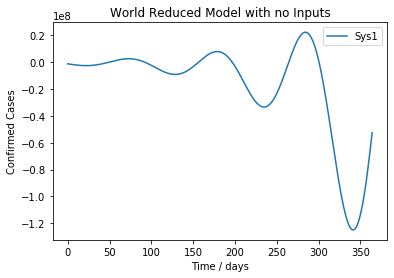

In [27]:
# With no input, these will be the same

yout1,t1,xout1 = lsim(sys1,U = 0.0, T = t, X0 = x0)
fig, ax = plt.subplots()
ax.plot(t,yout1,label='Sys1')
leg = ax.legend();

plt.title('World Reduced Model with no Inputs')
plt.xlabel('Time / days')
plt.ylabel('Confirmed Cases');

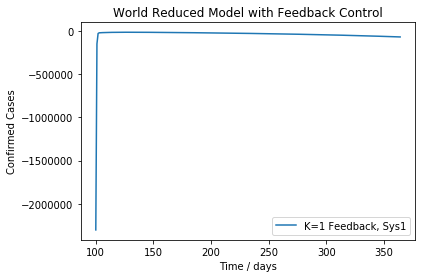

In [28]:
# Try proportional control
sysfb1 = feedback(sys1,1)
fbind = 100 # time index when feedback starts

# Run closed-loop systems
youtfb1,tfb1,xoutfb1 = lsim(sysfb1, T = t[fbind:], X0 = xout1[fbind])

# Plot results
fig, ax = plt.subplots()
ax.plot(tfb1,youtfb1,label='K=1 Feedback, Sys1')


plt.title('World Reduced Model with Feedback Control')
plt.xlabel('Time / days')
plt.ylabel('Confirmed Cases');
leg = ax.legend();

C:\Users\julia\Anaconda3\lib\site-packages\control\timeresp.py:318: ComplexWarning:

Casting complex values to real discards the imaginary part



K values: [[ 0.04045985  0.15421563 -0.11348584]]
S values: [[  4546.59698633  17666.73886522 -18167.35038129]
 [ 17666.73886522  71476.40999697 -73721.58608323]
 [-18167.35038129 -73721.58608323  80540.35236726]]
P values: [-0.01378914+0.j        -0.01500962+0.0598735j -0.01500962-0.0598735j]


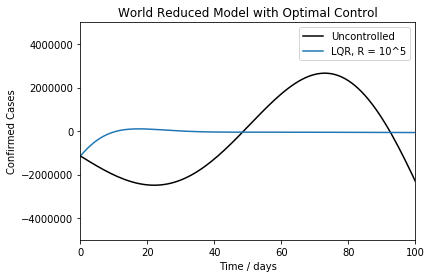

In [35]:
# LQR control

Q = np.identity(len(A));
R = 100000;
Klqr1,Slqr1,Plqr1 = lqr(Ac,B,Q,R) 

sysLQR1 = StateSpace(Ac- Klqr1*B,B,C,0)

youtfb1,tfb1,xoutfb1 = lsim(sysLQR1, T = t, X0 = x0)

fig, ax = plt.subplots()
ax.plot(t,yout1,'k',label='Uncontrolled')
ax.plot(tfb1,youtfb1,label='LQR, R = 10^5')
leg = ax.legend()
plt.title('World Reduced Model with Optimal Control')
plt.xlabel('Time / days')
plt.ylabel('Confirmed Cases');
plt.ylim(-5000000,5000000)
plt.xlim(0,100)


print('K values:', Klqr1)
print('S values:', Slqr1)
print('P values:', Plqr1)